<a href="https://colab.research.google.com/github/ImranRiazChohan/BMWW_ML_Problem/blob/main/BMWW(Project_OPENAIMP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline


In [3]:
df=pd.read_csv("/content/drive/MyDrive/OPENAIMP(WORK)/Copy of train_subset_data.csv")

In [4]:
df.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,30,0.0,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50,1
1,40,0.0,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,1
2,200,0.0,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,1
3,20,0.0,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,1
4,40,0.0,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,1


In [11]:
df.tail()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
5577,100,0.0,2,1,0,23,810,12,12,1,2,1,2,1,2,2,2,1,2,2,0,0,1200,460,1
5578,100,0.0,2,1,0,23,810,12,12,2,2,2,2,2,2,2,1,2,2,2,0,0,2060,150,1
5579,50,0.0,2,1,0,23,810,12,12,2,2,2,2,2,2,2,1,2,2,2,0,0,2060,150,1
5580,100,0.0,2,1,0,23,810,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,1120,360,1
5581,600,0.0,2,1,0,23,810,12,12,1,1,1,1,2,1,1,1,2,2,2,0,0,740,90,1


In [5]:
df.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
count,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000,5582.000000
mean,418.509495,21.093458,1.560910,1.144214,0.192046,31.443389,444.393228,11.915980,11.942315,1.600860,1.418309,1.603189,1.857757,1.696345,1.578825,1.314583,1.245611,1.687388,1.690792,1.901290,4689.537800,508.102472,2170.354712,615.120029,0.804371
std,1620.352547,138.684116,0.496321,0.510928,0.393944,10.730358,234.541190,0.991777,0.706210,0.489766,0.493326,0.489280,0.349330,0.459876,0.493792,0.464391,0.430487,0.463599,0.462209,0.298299,10901.153159,1015.595947,3846.292656,967.344897,0.396720
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,0.000000,1.000000,1.000000,0.000000,23.000000,280.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,430.000000,120.000000,1.000000
50%,80.000000,0.000000,2.000000,1.000000,0.000000,39.000000,440.000000,12.000000,12.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1075.000000,320.000000,1.000000
75%,200.000000,0.000000,2.000000,1.000000,0.000000,39.000000,620.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,4600.000000,1068.000000,2490.000000,730.000000,1.000000
max,57000.000000,1068.000000,2.000000,5.000000,1.000000,54.000000,910.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,136000.000000,13068.000000,38680.000000,9950.000000,1.000000


In [6]:
df.isnull().sum()

InscClaimAmtReimbursed             0
DeductibleAmtPaid                  0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
PotentialFraud                     0
dtype: int64

In [7]:
df.columns

Index(['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'PotentialFraud'],
      dtype='object')

In [13]:
df[ 'PotentialFraud'].unique()

array([1, 0])

In [21]:
df.shape

(5582, 25)

In [32]:
x=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values

In [36]:
x=x.astype(float)
y=y.astype(float)

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41,shuffle=True)

In [39]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
model.score(x_test,y_test)

0.9713518352730528

In [41]:
model.score(x_train,y_train)

0.9993281075027995

In [42]:
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
model1.score(x_test,y_test)

0.9776186213070726

In [44]:
model.score(x_train,y_train)

0.9993281075027995

In [45]:
model2=SVC()
model2.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
model2.score(x_test,y_test)

0.8254252461951657

In [47]:
model2.score(x_train,y_train)

0.8127659574468085

In [60]:
pred=model.predict(x_test)

In [61]:
cm = confusion_matrix(y_test, pred, labels=model.classes_)

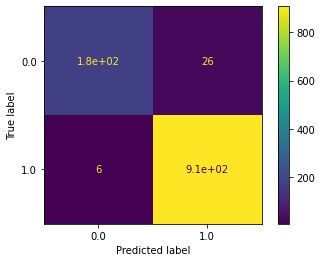

In [62]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()